Text(0.5, 1.0, 'Original Image')

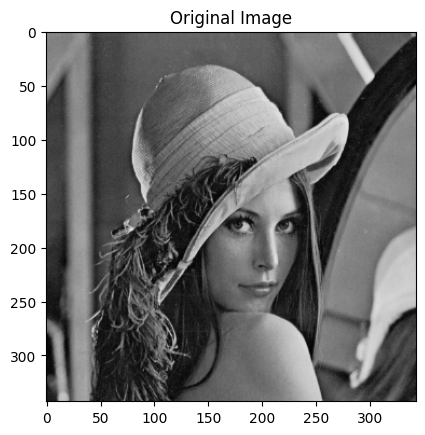

In [ ]:
#Read the image.
import cv2
import matplotlib.pyplot as plt

image_path = '/content/Lena-original-gray.png'
image = cv2.imread(image_path, cv2.IMREAD_COLOR)

plt.imshow(image)
plt.title('Original Image')


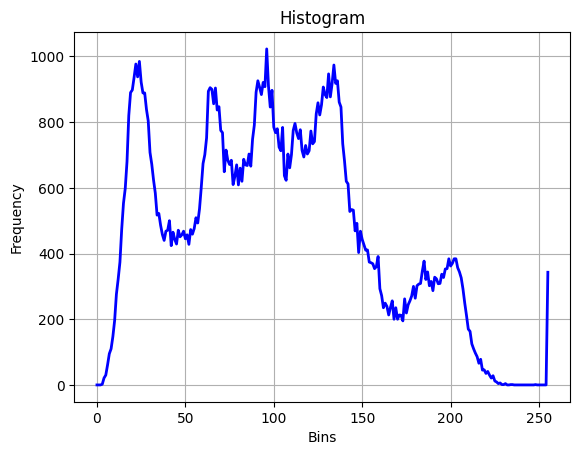

{3: 2, 4: 21, 5: 30, 6: 61, 7: 95, 8: 110, 9: 147, 10: 196, 11: 276, 12: 322, 13: 374, 14: 474, 15: 553, 16: 598, 17: 680, 18: 820, 19: 890, 20: 898, 21: 936, 22: 977, 23: 938, 24: 985, 25: 922, 26: 889, 27: 889, 28: 839, 29: 804, 30: 708, 31: 672, 32: 624, 33: 584, 34: 517, 35: 522, 36: 486, 37: 458, 38: 440, 39: 468, 40: 471, 41: 500, 42: 424, 43: 465, 44: 443, 45: 429, 46: 471, 47: 451, 48: 457, 49: 468, 50: 445, 51: 457, 52: 428, 53: 473, 54: 459, 55: 476, 56: 509, 57: 493, 58: 536, 59: 602, 60: 674, 61: 701, 62: 752, 63: 894, 64: 905, 65: 900, 66: 856, 67: 904, 68: 837, 69: 847, 70: 775, 71: 768, 72: 649, 73: 715, 74: 684, 75: 671, 76: 684, 77: 610, 78: 635, 79: 670, 80: 609, 81: 660, 82: 620, 83: 687, 84: 670, 85: 668, 86: 703, 87: 666, 88: 748, 89: 791, 90: 891, 91: 926, 92: 906, 93: 884, 94: 921, 95: 908, 96: 1023, 97: 910, 98: 846, 99: 897, 100: 785, 101: 768, 102: 780, 103: 724, 104: 713, 105: 784, 106: 637, 107: 623, 108: 703, 109: 661, 110: 701, 111: 775, 112: 796, 113: 767

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image_path = '/content/Lena-original-gray.png'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

hist, bins = np.histogram(image.flatten(), 256, [0, 256])

plt.plot(hist, color='blue', linewidth=2)
plt.title('Histogram')
plt.xlabel('Bins')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Create a dictionary of pixel counts
pixel_counts = {intensity: count for intensity, count in enumerate(hist) if count > 0}
print(pixel_counts)


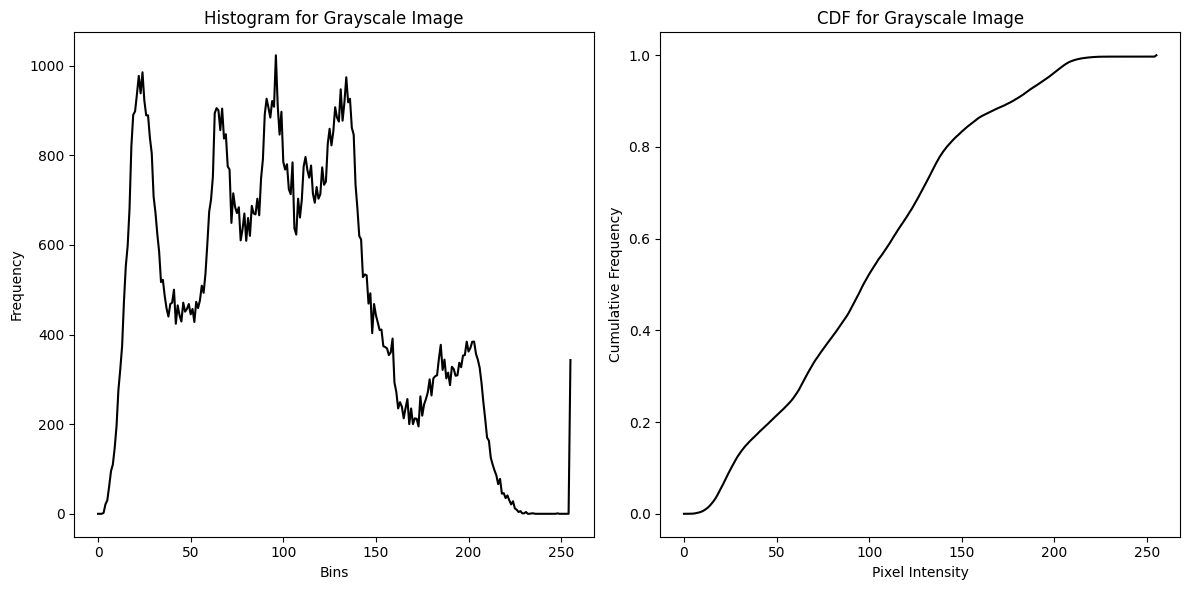

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image_path = '/content/Lena-original-gray.png'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

hist, bins = np.histogram(image.flatten(), 256, [0, 256])

# Compute CDF
cdf = hist.cumsum()
cdf_normalized = cdf / cdf.max()  # Normalize CDF to range [0, 1]

# Plotting the histogram and CDF
plt.figure(figsize=(12, 6))

# Plot Histogram
plt.subplot(1, 2, 1)
plt.plot(hist, color='black')
plt.title('Histogram for Grayscale Image')
plt.xlabel('Bins')
plt.ylabel('Frequency')

# Plot CDF
plt.subplot(1, 2, 2)
plt.plot(cdf_normalized, color='black')
plt.title('CDF for Grayscale Image')
plt.xlabel('Pixel Intensity')
plt.ylabel('Cumulative Frequency')

plt.tight_layout()
plt.show()


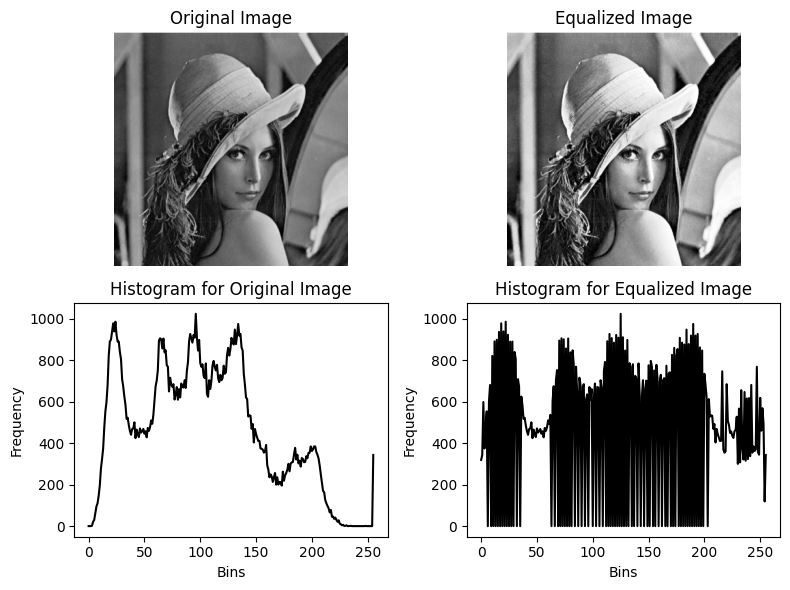

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image_path = '/content/Lena-original-gray.png'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

hist_original, bins_original = np.histogram(image.flatten(), 256, [0, 256])

cdf = hist_original.cumsum()
cdf_normalized = cdf / cdf.max()  # Normalize CDF to range [0, 1]

cdf_transformed = np.uint8(cdf_normalized * 255)
equalized_image = cdf_transformed[image]

# Compute histogram for the equalized image
hist_equalized, bins_equalized = np.histogram(equalized_image.flatten(), 256, [0, 256])

# Plotting original image, equalized image, histograms, and CDF
plt.figure(figsize=(8, 6))

# Plot original image
plt.subplot(2, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Plot equalized image
plt.subplot(2, 2, 2)
plt.imshow(equalized_image, cmap='gray')
plt.title('Equalized Image')
plt.axis('off')

# Plot Histogram for original image
plt.subplot(2, 2, 3)
plt.plot(hist_original, color='black')
plt.title('Histogram for Original Image')
plt.xlabel('Bins')
plt.ylabel('Frequency')

# Plot Histogram for equalized image
plt.subplot(2, 2, 4)
plt.plot(hist_equalized, color='black')
plt.title('Histogram for Equalized Image')
plt.xlabel('Bins')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

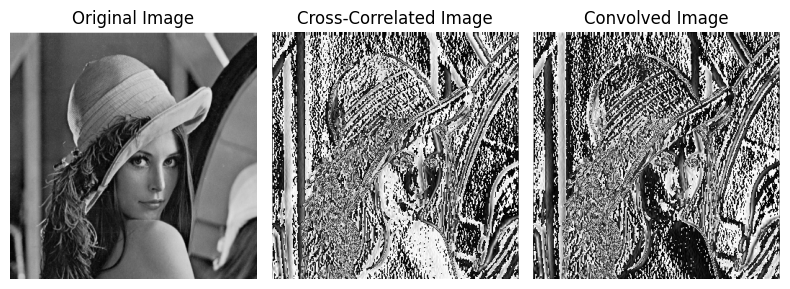

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image_path = '/content/Lena-original-gray.png'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

kernel = np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]])

def pad_image(image, pad_width, pad_value=0):
    return np.pad(image, pad_width, mode='constant', constant_values=pad_value)

def cross_correlation(image, kernel):
    kernel_height, kernel_width = kernel.shape
    pad_height = kernel_height // 2
    pad_width = kernel_width // 2

    padded_image = pad_image(image, ((pad_height, pad_height), (pad_width, pad_width)))

    output = np.zeros_like(image)

    # Perform cross-correlation
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            region = padded_image[i:i + kernel_height, j:j + kernel_width]
            output[i, j] = np.sum(region * kernel)

    return output

def convolution(image, kernel):
    # Flip the kernel vertically and horizontally
    flipped_kernel = np.flipud(np.fliplr(kernel))

    # Reuse cross-correlation function with the flipped kernel
    return cross_correlation(image, flipped_kernel)

# Apply cross-correlation and convolution to the image
cross_correlated_image = cross_correlation(image, kernel)
convolved_image = convolution(image, kernel)

# Plotting the results
plt.figure(figsize=(8, 6))

# Original Image
plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Cross-Correlated Image
plt.subplot(1, 3, 2)
plt.imshow(cross_correlated_image, cmap='gray')
plt.title('Cross-Correlated Image')
plt.axis('off')

# Convolved Image
plt.subplot(1, 3, 3)
plt.imshow(convolved_image, cmap='gray')
plt.title('Convolved Image')
plt.axis('off')

plt.tight_layout()
plt.show()


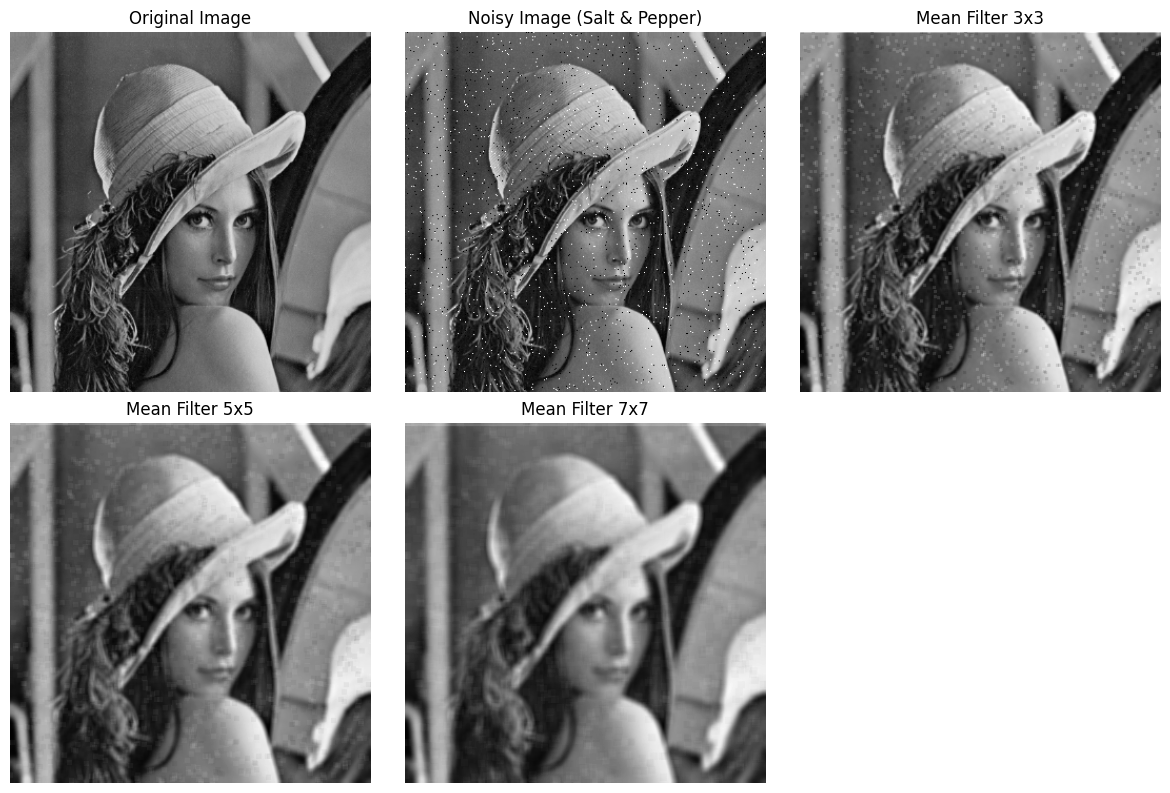

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def add_salt_and_pepper_noise(image, salt_prob, pepper_prob):

    noisy_image = np.copy(image)
    total_pixels = image.size

    # Salt noise
    num_salt = np.ceil(salt_prob * total_pixels)
    salt_coords = [np.random.randint(0, i-1, int(num_salt)) for i in image.shape]
    noisy_image[salt_coords[0], salt_coords[1]] = 255

    # Pepper noise
    num_pepper = np.ceil(pepper_prob * total_pixels)
    pepper_coords = [np.random.randint(0, i-1, int(num_pepper)) for i in image.shape]
    noisy_image[pepper_coords[0], pepper_coords[1]] = 0

    return noisy_image

def apply_mean_filter(image, kernel_size):

    kernel = np.ones((kernel_size, kernel_size), np.float32) / (kernel_size * kernel_size)
    return cv2.filter2D(image, -1, kernel)

image_path = '/content/Lena-original-gray.png'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

salt_prob = 0.01
pepper_prob = 0.01
noisy_image = add_salt_and_pepper_noise(image, salt_prob, pepper_prob)

# 3. Apply Mean Filter
mean_3x3 = apply_mean_filter(noisy_image, 3)
mean_5x5 = apply_mean_filter(noisy_image, 5)
mean_7x7 = apply_mean_filter(noisy_image, 7)

# 4. Display Results
plt.figure(figsize=(12, 8))

# Plot original image
plt.subplot(2, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Plot noisy image
plt.subplot(2, 3, 2)
plt.imshow(noisy_image, cmap='gray')
plt.title('Noisy Image (Salt & Pepper)')
plt.axis('off')

# Plot Mean Filter 3x3
plt.subplot(2, 3, 3)
plt.imshow(mean_3x3, cmap='gray')
plt.title('Mean Filter 3x3')
plt.axis('off')

# Plot Mean Filter 5x5
plt.subplot(2, 3, 4)
plt.imshow(mean_5x5, cmap='gray')
plt.title('Mean Filter 5x5')
plt.axis('off')

# Plot Mean Filter 7x7
plt.subplot(2, 3, 5)
plt.imshow(mean_7x7, cmap='gray')
plt.title('Mean Filter 7x7')
plt.axis('off')

plt.tight_layout()
plt.show()
